In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [25]:
# No site não tinha a opção de ser via link, então tivo que deixar eles armazenados na nuvem 

file_id10 = '1GlXcIkS3K3hvP6dFsVZMun4pMTuBJnqb' 
url10 = f'https://drive.google.com/uc?export=download&id={file_id10}'

file_id11 = '1AMZRm7jFOCtGrcHKSDU67rS9V2DZUE4t' 
url11 = f'https://drive.google.com/uc?export=download&id={file_id11}'

file_id12 = '1kqY4RaUPNwZMFYlewF5k_M9131WdKcE-' 
url12 = f'https://drive.google.com/uc?export=download&id={file_id12}'

file_id13 = '1P9LnCmvX15LfHbdQ1rZQ_6V19eRobBr7' 
url13 = f'https://drive.google.com/uc?export=download&id={file_id13}'

file_id14 = '18uaJARuPpA3p308l2NcZm55saLURIpTO' 
url14 = f'https://drive.google.com/uc?export=download&id={file_id14}'

file_id15 = '1RHPGVVmG2qRekAwysHvmnJvAXn0qmH5J' 
url15 = f'https://drive.google.com/uc?export=download&id={file_id15}'

file_id16 = '1LVwvD3GrUF6qFAKW4w9RnsrIDMJ9soNq' 
url16 = f'https://drive.google.com/uc?export=download&id={file_id16}'

file_id17 = '1h0b_jzFAMbjgQzQ9s1reZGgbXTThPcPr' 
url17 = f'https://drive.google.com/uc?export=download&id={file_id17}'

file_id18 = '14goWMFuD76M5P-SavPIxI8B_WiXgrnd9' 
url18 = f'https://drive.google.com/uc?export=download&id={file_id18}'

file_id19 = '1ArTa_67aIf5w0wC6tZ5PVq7lJAMXYZX2'
url19 = f'https://drive.google.com/uc?export=download&id={file_id19}'

file_id20 = '1ey7pDu2uTkfn0Jr0fhBJwACk_uP1lXd2' 
url20 = f'https://drive.google.com/uc?export=download&id={file_id20}'

#importando todas as bases( dos últimos 10 anos disponiíveis)
df10 = pd.read_csv (url10,sep=';', encoding='ISO-8859-1')
df11 = pd.read_csv (url11,sep=';', encoding='ISO-8859-1')
df12 = pd.read_csv (url12,sep=';', encoding='ISO-8859-1')
df13 = pd.read_csv (url13,sep=';', encoding='ISO-8859-1')
df14 = pd.read_csv (url14,sep=';', encoding='ISO-8859-1')
df15 = pd.read_csv (url15,sep=';', encoding='ISO-8859-1')
df16 = pd.read_csv (url16,sep=';', encoding='ISO-8859-1')
df17 = pd.read_csv (url17,sep=';', encoding='UTF-8') 
df18 = pd.read_csv (url18,sep=';', encoding='UTF-8')
df19 = pd.read_csv (url19,sep=';', encoding='UTF-8')
df20 = pd.read_csv (url20,sep=';', encoding='ISO-8859-1')

# Criando uma lista pra facilitar o concat
lista_dfs = [df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20]

# Juntando as bases 
df= pd.concat(lista_dfs, ignore_index=True)
df['ANO_CONCESSAO_BOLSA'] = df['ANO_CONCESSAO_BOLSA'].astype('Int64')

In [26]:
#Tratando a base: Os nomes das colunas estão divergentes
df['Sexo'] = df['SEXO_BENEFICIARIO'].combine_first(df['SEXO_BENEFICIARIO_BOLSA'])
df['Raca'] = df['RACA_BENEFICIARIO'].combine_first(df['RACA_BENEFICIARIO_BOLSA'])
df['UF'] = df['UF_BENEFICIARIO'].combine_first(df['SIGLA_UF_BENEFICIARIO_BOLSA'])
df['Municipio'] = df['MUNICIPIO_BENEFICIARIO'].combine_first(df['MUNICIPIO_BENEFICIARIO_BOLSA'])
df['Municipio'] = df['Municipio'].combine_first(df['MUNICIPIO'])
df['Regiao'] = df['REGIAO_BENEFICIARIO'].combine_first(df['REGIAO_BENEFICIARIO_BOLSA'])

# Eliminando as colunas duplicadas antigas e obsoletas
df.drop(columns=[
    'CPF_BENEFICIARIO', 'CPF_BENEFICIARIO_BOLSA',
    'DATA_NASCIMENTO', 'DT_NASCIMENTO_BENEFICIARIO',
    'SEXO_BENEFICIARIO', 'SEXO_BENEFICIARIO_BOLSA',
    'RACA_BENEFICIARIO', 'RACA_BENEFICIARIO_BOLSA',
    'UF_BENEFICIARIO', 'SIGLA_UF_BENEFICIARIO_BOLSA',
    'MUNICIPIO', 'MUNICIPIO_BENEFICIARIO','MUNICIPIO_BENEFICIARIO_BOLSA',
    'REGIAO_BENEFICIARIO', 'REGIAO_BENEFICIARIO_BOLSA'
], inplace=True)

df = df.rename(columns={
    # Padronização de ano
    'ANO_CONCESSAO_BOLSA': 'Ano',

    # IES
    'CODIGO_EMEC_IES_BOLSA': 'Codigo_IES',
    'NOME_IES_BOLSA': 'Nome_IES',
    
    # Curso
    'CAMPUS': 'Campus',
    'TIPO_BOLSA': 'Tipo_Bolsa',
    'MODALIDADE_ENSINO_BOLSA': 'Modalidade',
    'NOME_CURSO_BOLSA': 'Curso',
    'NOME_TURNO_CURSO_BOLSA': 'Turno',

    # Beneficiário
    'BENEFICIARIO_DEFICIENTE_FISICO': 'Deficiencia'
})

# Mesma coisa, nomes diferentes pra mesmas coisas
df['Tipo_Bolsa'] = df['Tipo_Bolsa'].replace({
    'BOLSA INTEGRAL': 'INTEGRAL',
    'INTEGRAL': 'INTEGRAL',
    'BOLSA PARCIAL 50%': 'PARCIAL',
    'PARCIAL': 'PARCIAL'
})
df['Modalidade'] = df['Modalidade'].replace({
    'EDUCAÇÃO A DISTÂNCIA': 'EAD',
    'PRESENCIAL': 'Presencial',

})

In [27]:
#Criei uma coluna auxiliar pra me ajudar a fazer os agrupamentos
df['Cont'] = 1

# Padronizando o texto
df['Curso'] = df['Curso'].str.title().str.strip()

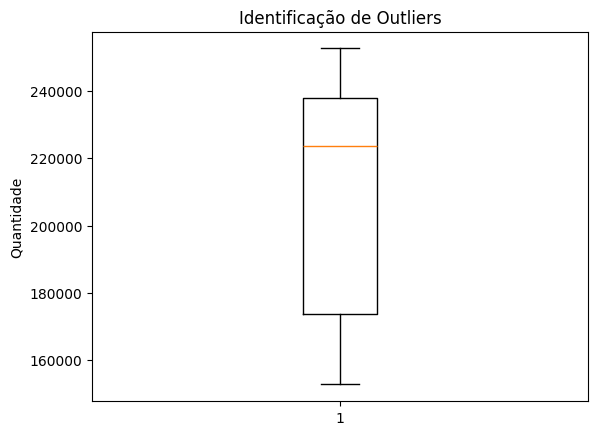

In [28]:
# 1- Evolução do numero de bolsa________________________________________________
df_bolsa = df.groupby('Ano')['Cont'].sum().reset_index()

#media e mediana
media_bolsa= df_bolsa.mean()
mediana_bolsa = df_bolsa.median()

# array
dados_bolsa= np.array(df_bolsa['Cont']) 

#quartis
bolsa_q1= np.percentile(dados_bolsa,25)
bolsa_q2= np.percentile(dados_bolsa,50)
bolsa_q3= np.percentile(dados_bolsa,75)

bolsa_iqr= bolsa_q3 - bolsa_q1
bolsa_ls= bolsa_q3 + (1.5*bolsa_iqr) #limite superior
bolsa_li= bolsa_q1 - (1.5*bolsa_iqr) # limite inferior

bolsa_outliers = df_bolsa[(df_bolsa['Cont'] < bolsa_li) | (df_bolsa['Cont'] > bolsa_ls)]

# gráfico de outliers
plt.boxplot(dados_bolsa)
plt.title("Identificação de Outliers")
plt.ylabel("Quantidade")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

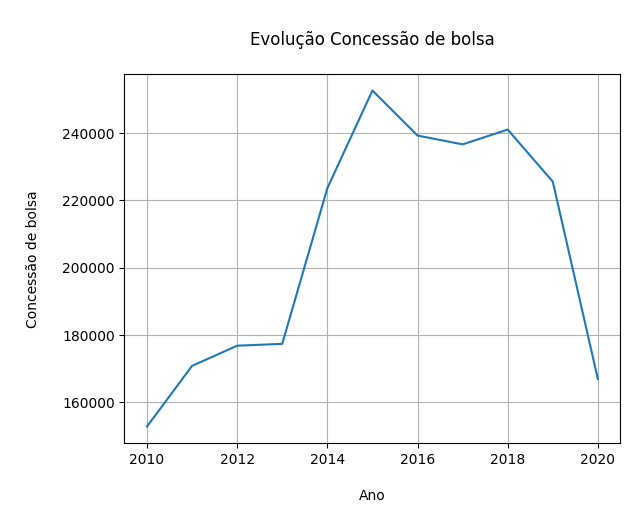

In [29]:
#gráfico
plt.plot(df_bolsa['Ano'],df_bolsa['Cont'])
plt.title('\nEvolução Concessão de bolsa\n')
plt.xlabel('\nAno\n')
plt.ylabel('\nConcessão de bolsa\n')
plt.grid(True)
plt.show

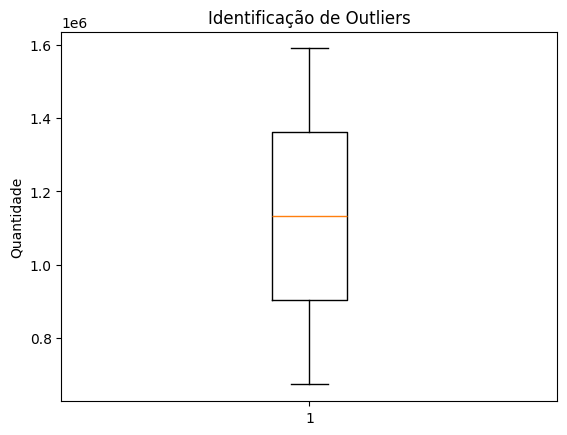

In [34]:
# 2- Distribuição por tipo de bolsa_____________________________________________
df_tipo_bolsa= df.groupby('Tipo_Bolsa')['Cont'].sum().reset_index()

#media e mediana
media_tipo_bolsa = df_tipo_bolsa['Cont'].mean()
mediana_tipo_bolsa = df_tipo_bolsa['Cont'].median()

# array
dados_tipo_bolsa= np.array(df_tipo_bolsa['Cont']) 

#quartis
tipo_bolsa_q1= np.percentile(dados_tipo_bolsa,25)
tipo_bolsa_q2= np.percentile(dados_tipo_bolsa,50)
tipo_bolsa_q3= np.percentile(dados_tipo_bolsa,75)

tipo_bolsa_iqr= tipo_bolsa_q3 - tipo_bolsa_q1
tipo_bolsa_ls= tipo_bolsa_q3 + (1.5*tipo_bolsa_iqr) #limite superior
tipo_bolsa_li= tipo_bolsa_q1 - (1.5*tipo_bolsa_iqr) # limite inferior

tipo_bolsa_outliers = df_tipo_bolsa[(df_tipo_bolsa['Cont'] < tipo_bolsa_li) | (df_tipo_bolsa['Cont'] > tipo_bolsa_ls)]

# gráfico de outliers
plt.boxplot(dados_tipo_bolsa)
plt.title("Identificação de Outliers")
plt.ylabel("Quantidade")
plt.show()




<function matplotlib.pyplot.show(close=None, block=None)>

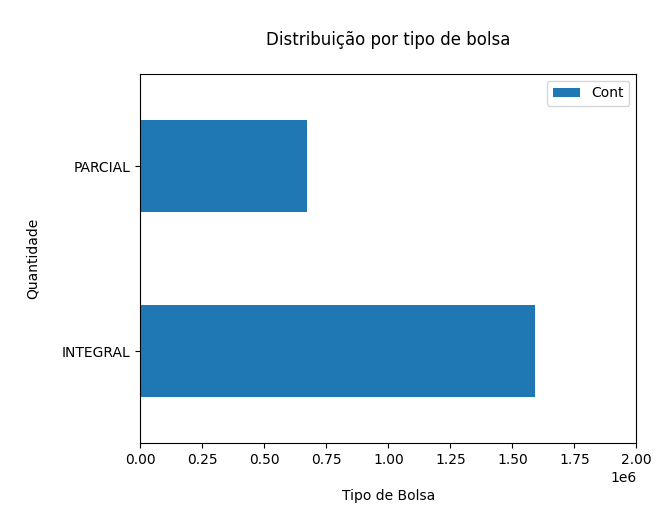

In [35]:
#grafico
df_tipo_bolsa.plot(kind= 'barh', x = 'Tipo_Bolsa', y= 'Cont')
plt.title('\nDistribuição por tipo de bolsa\n')
plt.xlabel('\nTipo de Bolsa\n')
plt.ylabel('\nQuantidade\n')
plt.xlim(0, 2000000) 
plt.show

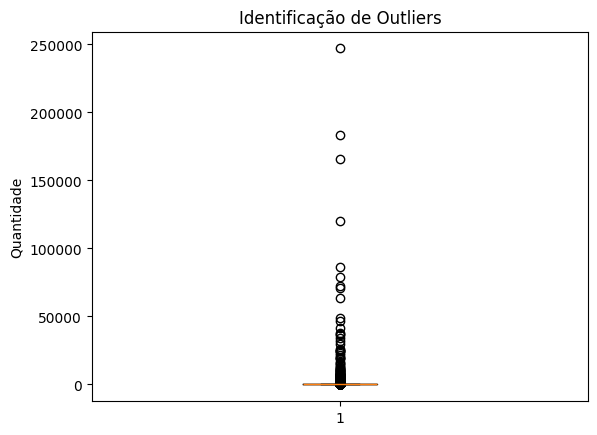

In [38]:
# 3- Cursos Mais procurados_____________________________________________________ 
df_curso = df.groupby('Curso')['Cont'].sum().reset_index()


#media e mediana
media_curso= df_curso['Cont'].mean()
mediana_curso = df_curso['Cont'].median()

# array
dados_curso= np.array(df_curso['Cont']) 

#quartis
curso_q1= np.percentile(dados_curso,25)
curso_q2= np.percentile(dados_curso,50)
curso_q3= np.percentile(dados_curso,75)

curso_iqr= curso_q3 - curso_q1
curso_ls= curso_q3 + (1.5*curso_iqr) #limite superior
curso_li= curso_q1 - (1.5*curso_iqr) # limite inferior

curso_outliers = df_curso[(df_curso['Cont'] < curso_li) | (df_curso['Cont'] > curso_ls)]

# gráfico de outliers
plt.boxplot(dados_curso)
plt.title("Identificação de Outliers")
plt.ylabel("Quantidade")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

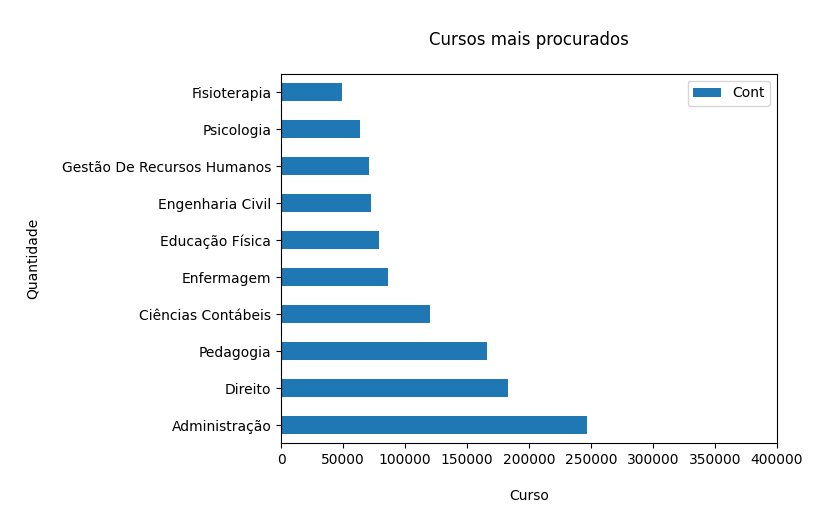

In [39]:
df_curso = df_curso.sort_values(by='Cont', ascending=False).head(10)
#gráfico
df_curso.plot(kind= 'barh', x = 'Curso', y= 'Cont')
plt.title('\nCursos mais procurados\n')
plt.xlabel('\nCurso\n')
plt.ylabel('\nQuantidade\n')
plt.xlim(0, 400000) 
plt.show

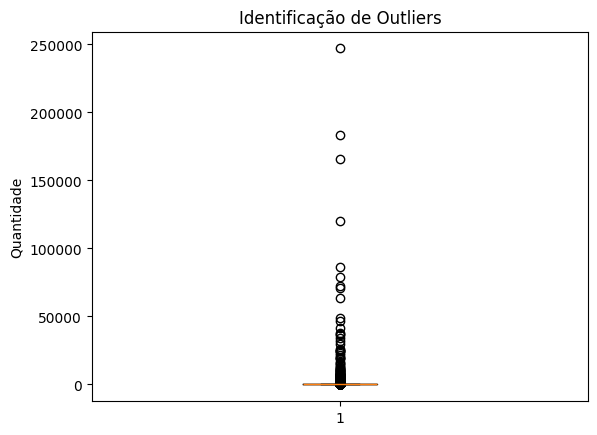

In [41]:
# 4- Distribuiçao por municipio________________________________________________            
df_muni = df.groupby('Municipio')['Cont'].sum().reset_index()


#media e mediana
media_muni= df_muni['Cont'].mean()
mediana_muni = df_muni['Cont'].median()

# array
dados_muni= np.array(df_muni['Cont']) 

#quartis
muni_q1= np.percentile(dados_muni,25)
muni_q2= np.percentile(dados_muni,50)
muni_q3= np.percentile(dados_muni,75)

muni_iqr= muni_q3 - muni_q1
muni_ls= muni_q3 + (1.5*muni_iqr) #limite superior
muni_li= muni_q1 - (1.5*muni_iqr) # limite inferior

muni_outliers = df_muni[(df_muni['Cont'] < muni_li) | (df_muni['Cont'] > muni_ls)]

# gráfico de outliers
plt.boxplot(dados_curso)
plt.title("Identificação de Outliers")
plt.ylabel("Quantidade")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

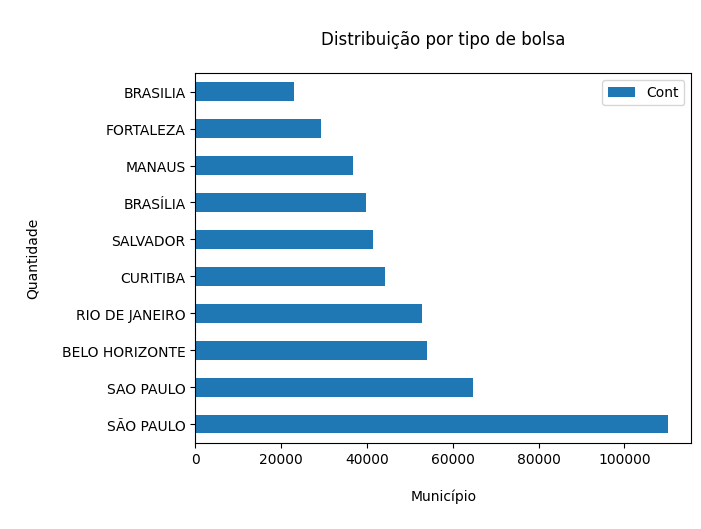

In [42]:
df_muni = df_muni.sort_values(by='Cont', ascending=False).head(10)

df_muni.plot(kind= 'barh', x = 'Municipio', y= 'Cont')
plt.title('\nDistribuição por tipo de bolsa\n')
plt.xlabel('\nMunicípio\n')
plt.ylabel('\nQuantidade\n')
plt.show

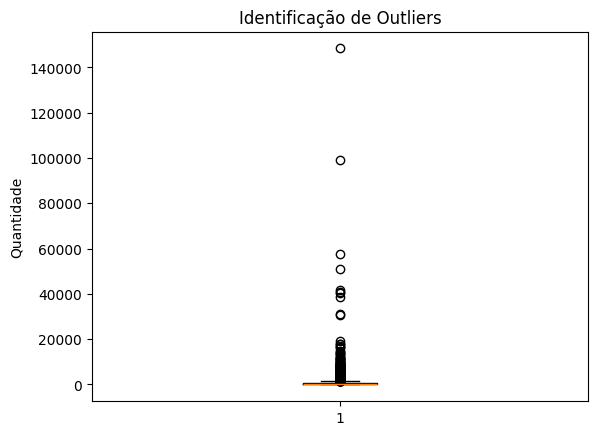

In [43]:
# 5- Universidades que mais oferecem bolsa ____________________________
df_uni= df.groupby('Nome_IES')['Cont'].sum().reset_index()

#media e mediana

media_uni= df_uni['Cont'].mean()
mediana_uni = df_uni['Cont'].median()

# quartis, arrays, outliers

dados_uni= np.array(df_uni['Cont']) # array

#quartis
uni_q1= np.percentile(dados_uni,25)
uni_q2= np.percentile(dados_uni,50)
uni_q3= np.percentile(dados_uni,75)

uni_iqr= uni_q3 - uni_q1
uni_ls= uni_q3 + (1.5*uni_iqr) #limite superior
uni_li= uni_q1 - (1.5*uni_iqr) # limite inferior

uni_outliers = df_uni[(df_uni['Cont'] < uni_li) | (df_uni['Cont'] > uni_ls)]

# gráfico de outliers
plt.boxplot(dados_uni)
plt.title("Identificação de Outliers")
plt.ylabel("Quantidade")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

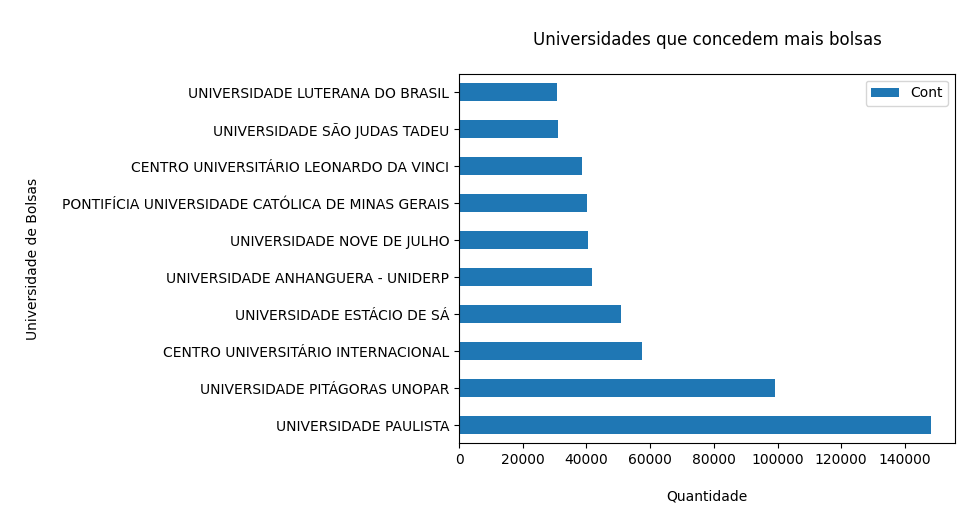

In [44]:

# 5.1 Universidade que compoem as 25% com mais bolsas
maior_uni_25= df_uni.loc[df_uni['Cont'] >= uni_q3]
maior_uni_25= maior_uni_25.sort_values('Cont', ascending=False).head(10)

# gráfico 
maior_uni_25.plot(kind= 'barh', x = 'Nome_IES', y= 'Cont')
plt.title('\nUniversidades que concedem mais bolsas\n')
plt.xlabel('\nQuantidade\n')
plt.ylabel('\nUniversidade de Bolsas\n')
plt.show


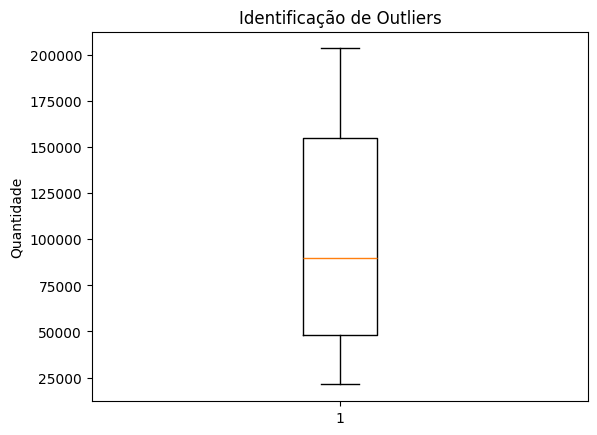

In [46]:
# 6 - Impacto da Digitalização na Modalidade de Ensino _______________________________________________________________

df_modalidade = df.groupby(['Ano', 'Modalidade']).size().reset_index(name='Cont')
df_total_ano = df_modalidade.groupby('Ano')['Cont'].transform('sum')

#media e mediana
media_modalidade= df_modalidade['Cont'].mean()
mediana_modalidade = df_modalidade['Cont'].median()

# array
dados_modalidade= np.array(df_modalidade['Cont']) 

#quartis
modalidade_q1= np.percentile(dados_modalidade,25)
modalidade_q2= np.percentile(dados_modalidade,50)
modalidade_q3= np.percentile(dados_modalidade,75)

modalidade_iqr= modalidade_q3 - modalidade_q1
modalidade_ls= modalidade_q3 + (1.5*modalidade_iqr) #limite superior
modalidade_li= modalidade_q1 - (1.5*modalidade_iqr) # limite inferior

modalidade_outliers = df_modalidade[(df_modalidade['Cont'] < modalidade_li) | (df_modalidade['Cont'] > modalidade_ls)]

# gráfico de outliers
plt.boxplot(dados_modalidade)
plt.title("Identificação de Outliers")
plt.ylabel("Quantidade")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

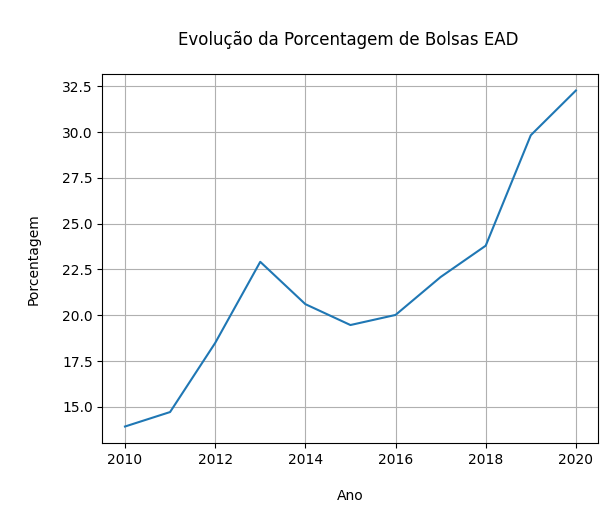

In [47]:
df_modalidade['Porcentagem'] = (df_modalidade['Cont'] / df_total_ano) * 100 # adicionando uma coluna de porcentagem pra cada modalidade
df_modalidade['Porcentagem'] = df_modalidade['Porcentagem'].round(2) # arredondando 

# 6.1 Evolução da Porcentagem de Bolsas EAD 

df_ead = df_modalidade[df_modalidade['Modalidade'] == 'EAD']
df_ead = df_ead.sort_values(by='Ano')

#gráfico
plt.plot(df_ead['Ano'],df_ead['Porcentagem'])
plt.title('\nEvolução da Porcentagem de Bolsas EAD \n')
plt.xlabel('\nAno\n')
plt.ylabel('\nPorcentagem\n')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

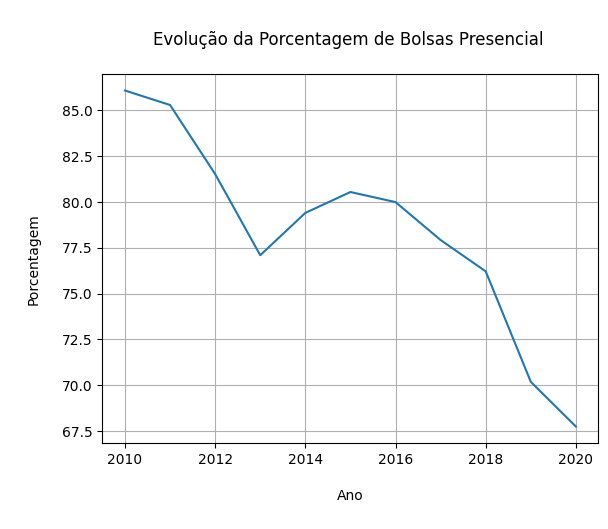

In [48]:
# 6.2 Evolução da Porcentagem de Bolsas Presenciais

df_presencial = df_modalidade[df_modalidade['Modalidade'] == 'Presencial']
df_presencial = df_presencial.sort_values(by='Ano')

#gráfico
plt.plot(df_presencial['Ano'],df_presencial['Porcentagem'])
plt.title('\nEvolução da Porcentagem de Bolsas Presencial \n')
plt.xlabel('\nAno\n')
plt.ylabel('\nPorcentagem\n')
plt.grid(True)
plt.show
